<center>
<img src="https://i.ibb.co/b3T5hkz/logo.png" alt="logo" border="0" width=600>


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Read and separate the images and labels from the file
imagenes = np.load('/content/drive/MyDrive/Colab Notebooks/Neural Networks/BH Convolutional/data/images_data.npy')
etiquetas = np.load('/content/drive/MyDrive/Colab Notebooks/Neural Networks/BH Convolutional/data/labels.npy')


In [5]:
etiquetas.shape

(1000,)

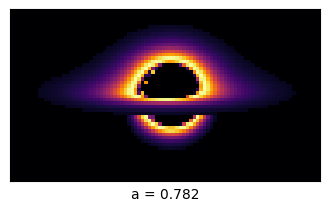

In [34]:
i = int(np.random.rand(1)*1000)
plt.figure(figsize=(4,5))
plt.imshow(imagenes[i].T, origin='lower', cmap='inferno')
plt.xticks([])
plt.yticks([])
plt.xlabel(f'a = {etiquetas[i]:.3f}')
plt.show()

In [20]:
imagenes.max()

0.05479026285168367

In [21]:
from sklearn.model_selection import train_test_split

train_idx, test_idx = train_test_split(np.arange(etiquetas.shape[0]), test_size=0.1, random_state=413)
train_images, train_labels, test_images, test_labels = imagenes[train_idx], etiquetas[train_idx], imagenes[test_idx], etiquetas[test_idx]

In [24]:
test_images.shape

(100, 90, 50)

In [26]:
import tensorflow as tf

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(90, 50, 1)))



In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [28]:
# print model summary before training
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 88, 48, 64)        640       
                                                                 
Total params: 640 (2.50 KB)
Trainable params: 640 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
history = model.fit(train_images, train_labels, epochs=1)

InvalidArgumentError: ignored